<a href="https://colab.research.google.com/github/wahyunh10/Employee-Turnover-Project/blob/main/employe_turnover_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Can you help reduce employee turnover?**

**Background**

You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

**The data**

The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

* "department" - the department the employee belongs to.
* "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
* "review" - the composite score the employee received in their last evaluation.
* "projects" - how many projects the employee is involved in.
* "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
* "tenure" - how many years the employee has been at the company.
* "satisfaction" - a measure of employee satisfaction from surveys.
* "avg_hrs_month" - the average hours the employee worked in a month.
* "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

In [4]:
df = pd.read_csv('employee turnover.csv')
df

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no
...,...,...,...,...,...,...,...,...,...,...
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes


# **1. Which department has the highest employee turnover? Which one has the lowest?**

**What kind of departments does our corporation has?**
* Operations
* Support
* Logistics
* Sales
* IT
* Admin
* Engineering
* Marketing
* Finance
* Retail

In [5]:
departments = df.department.unique()

**How many peoples does each department has?**

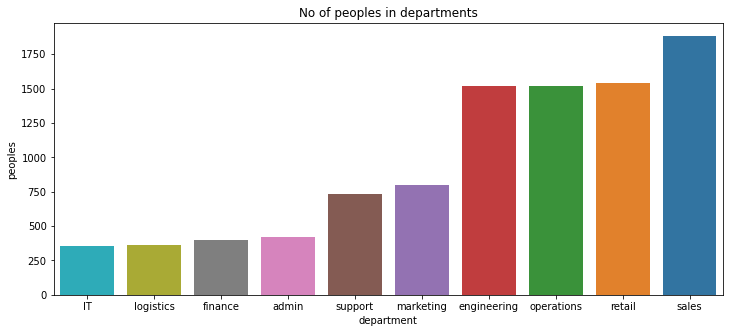

In [6]:
dept = df.department.value_counts()
plt.figure(figsize= (12,5))
sns.categorical.barplot(x = dept.keys(), y = dept.values).invert_xaxis()
plt.title("No of peoples in departments")
plt.xlabel("department")
plt.ylabel("peoples")
plt.show()